In [1]:
import os
import sys
import numpy as np
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt

In [2]:
SEQLENGTH = 32

def splitLine(l):

    return l.split('\t')

def seq2vec(s, onehot = True):

    s = s.upper()
    s = s.replace('A', '0')
    s = s.replace('G', '1')
    s = s.replace('T', '2')
    s = s.replace('C', '3')
    s = s.replace('W', '4')
    s = list(s)

    if onehot:

        vec = np.zeros((5, len(s)))
        vec[np.array(s, dtype = np.int32), np.arange(len(s))] = 1

        return np.array(vec, dtype = np.float32)

    else:

        return s

In [3]:
with open('/home/dataset/genome/hg38/devData/trainData_chrM_original.fa', 'r') as fs:
    
    lines = fs.readlines()[:-1]
    data = list(map(splitLine, lines))

In [4]:
parsed = list()
vecs = list()
idxs = list()

for d1, d2 in data:
    
    parsed.append((seq2vec(d1), int(d2)))

for d in parsed:
    
    vecs.append(d[0].reshape(-1))
    idxs.append(d[1])
    
vecs = np.array(vecs)
idxs = np.array(idxs)

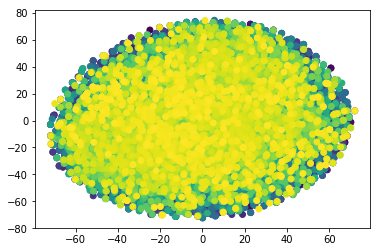

In [5]:
embedding_tsne = TSNE(n_components = 2).fit_transform(vecs)
plt.scatter(embedding_tsne[:,0], embedding_tsne[:,1], c = idxs)
plt.show()

/home/youngwoo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


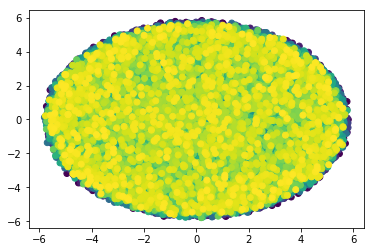

In [9]:
embedding_mds = MDS(n_components = 2, n_jobs = 20).fit_transform(vecs)
plt.scatter(embedding_mds[:,0], embedding_mds[:,1], c = idxs)
plt.show()

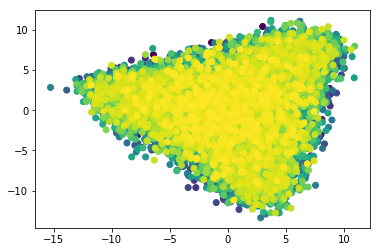

In [7]:
embedding_isomap = Isomap(n_neighbors = 5, n_components = 2, n_jobs = 20).fit_transform(vecs)
plt.scatter(embedding_isomap[:,0], embedding_isomap[:,1], c = idxs)
plt.show()

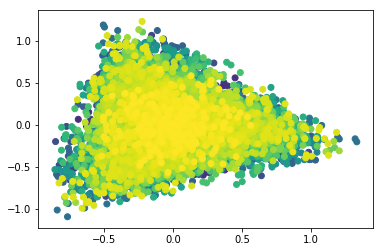

In [8]:
embedding_spectral = SpectralEmbedding(n_components = 2, n_jobs = 20).fit_transform(vecs)
plt.scatter(embedding_spectral[:,0], embedding_spectral[:,1], c = idxs)
plt.show()